In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix,accuracy_score

In [3]:
#Avarage values of each class
m = [np.array([-1,-1]),np.array([2,4]),np.array([-2,2])]
#Size of each class and vector of classes
n = [30,30,30]
k = [1,2,3]
#Matrix of covariance
S = np.array([[1,0],[0,1]])

#Generating points from a normal distribution 
Xx = [0 for x in range(len(n))]
yy = [0 for x in range(len(n))]

for i in range(len(n)):
    Xx[i] = np.random.multivariate_normal(m[i],S,n[i]) 
    yy[i] = np.full(n[i],i+1)
    
#Vector of points from normal distribution, classes included
X = np.concatenate(Xx)
y = np.concatenate(yy)

In [4]:
#SVM
#Regularization parameter vector - C 
C = [0.1,0.2,0.5,1,2,5,10,20,50,100,200,500]
svm_acc = []
for c in C:
    svm = SVC(C=c,kernel='linear',random_state=1)
    svm.fit(X,y)
    preditions_svm = svm.predict(X)
    svm_acc.append(accuracy_score(y,preditions_svm))

In [5]:
#LDA
#C parameter is not used in LDA, we take it into account only for comparision
lda_acc = []
for c in C:
    lda = LDA()
    lda.fit(X,y)
    preditions_lda = lda.predict(X)
    lda_acc.append(accuracy_score(y,preditions_lda)) 

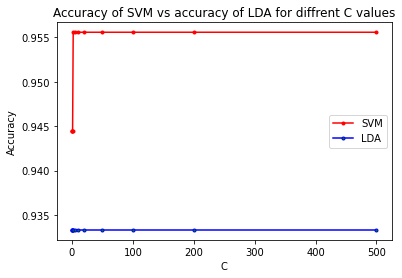

In [6]:
#SVM vs LDA
fig, ax = plt.subplots()
ax.plot(C,svm_acc,color='red', linestyle='-',
        marker='o',markerfacecolor='red', markersize=3, label="SVM")
ax.plot(C,lda_acc,color='blue', linestyle='-',
        marker='o',markerfacecolor='green', markersize=3, label="LDA")
ax.set_title('Accuracy of SVM vs accuracy of LDA for diffrent C values')
ax.set_xlabel('C')
ax.set_ylabel('Accuracy')
ax.legend()
plt.show()

The graph shows that for a C value of 20 we obtain the maximum effectiveness of the SVM linear classifier. As a regularization parameter, it is responsible for how exactly we want not to make a mistake in the classification. For larger C values less incorrect classifications. SVM achieves better efficiency than LDA classifier, we can say that for our data set it is better classifier.

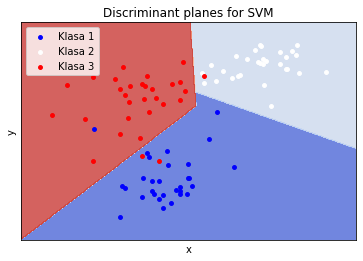

In [7]:
#Functions for graphical representation of dicriminant planes
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Discriminant planes for SVM')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X[:30,0], X[:30,1], color = "blue",s=15, label="Klasa 1")
ax.scatter(X[30:60,0], X[30:60,1], color = "white",s=15, label="Klasa 2")
ax.scatter(X[60:90,0], X[60:90,1], color = "red",s=15, label="Klasa 3")

ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()